<a href="https://colab.research.google.com/github/Sougata02-shee/Uber_data_analysis/blob/main/Uber_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('UberDataset.csv')
df.isna().sum()
df=df.drop(df.loc[1155:].index) # drop the last row as it is completely null
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
# replace the Kar?chi	to karachi
df['START']=df['START'].replace('Kar?chi','karachi')
df['STOP']=df['STOP'].replace('Kar?chi','karachi')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,karachi,karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [ ]:
# convert to object to datetime
import datetime
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce',format='mixed')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce',format='mixed')
df['duration']=(df['END_DATE']-df['START_DATE'])
df['duration']=df['duration'].dt.total_seconds()/60

In [ ]:
# here we split the date_time and create another column for date and time
# Remove the datetime column
df['START_TIME']=df['START_DATE'].dt.hour
print(df['START_TIME'])
df['END_TIME']=df['END_DATE'].dt.hour
df['Start_date']=df['START_DATE'].dt.date
df['End_date']=df['END_DATE'].dt.date
df.drop(columns='END_DATE',axis=1,inplace=True)
df.drop(columns='START_DATE',axis=1,inplace=True)

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: START_TIME, Length: 1155, dtype: int32


EDA(Exploratory data Analysis)

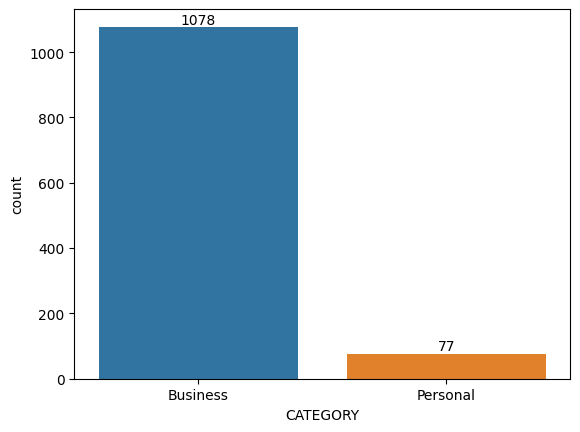

In [ ]:
a=sns.countplot(x='CATEGORY',data=df,hue='CATEGORY')
for i in a.containers:
  a.bar_label(i)

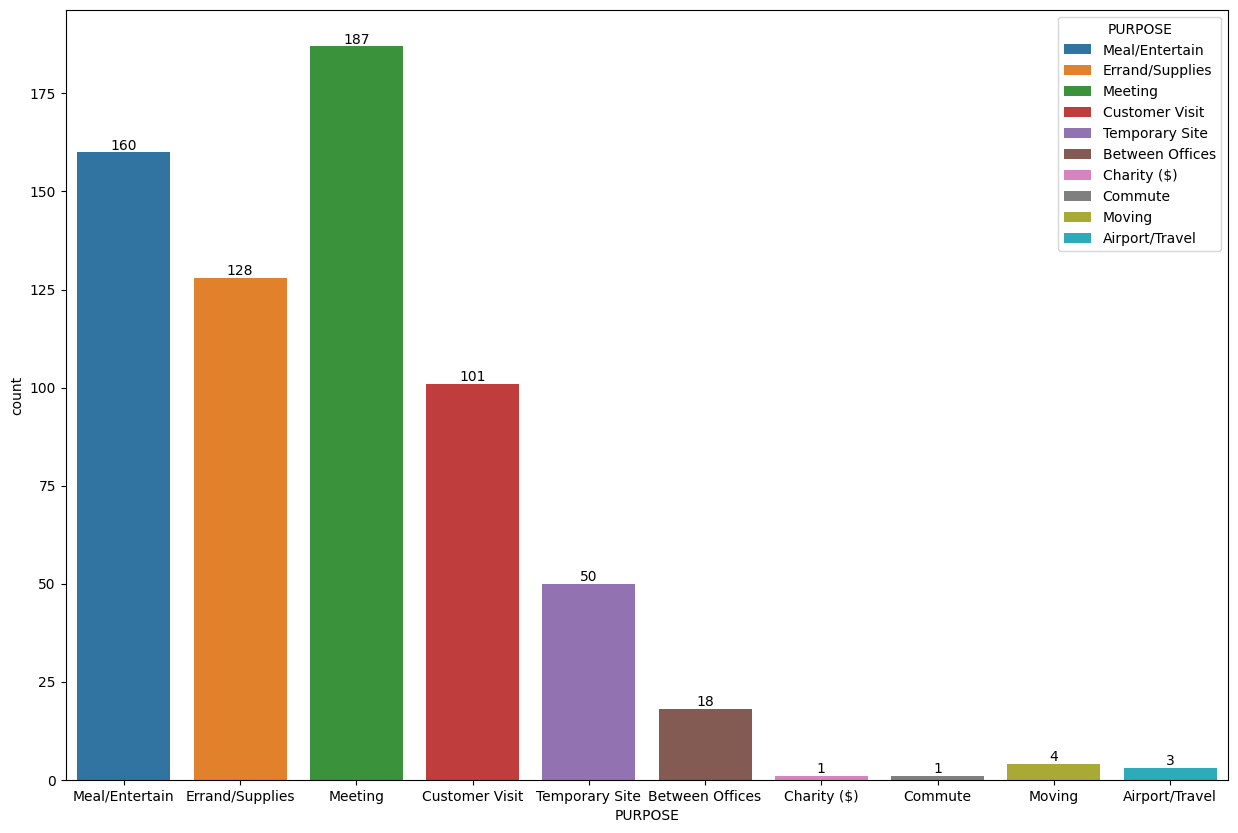

In [ ]:
plt.figure(figsize=(15,10))
a=sns.countplot(x='PURPOSE',data=df,hue='PURPOSE')
for i in a.containers:
  a.bar_label(i)

<ipython-input-178-3974571952>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  b=pd.pivot_table(data=df,index=a,columns='PURPOSE',values='START_TIME',aggfunc=sum)
<ipython-input-178-3974571952>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  b=pd.pivot_table(data=df,index=a,columns='PURPOSE',values='START_TIME',aggfunc=sum)


<Axes: xlabel='PURPOSE', ylabel='START_TIME'>

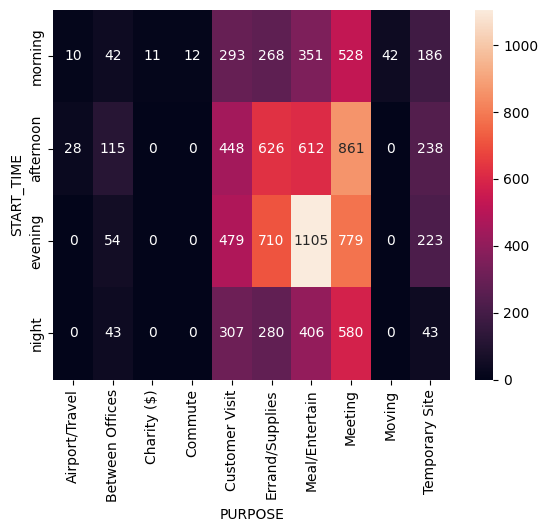

In [ ]:
a=pd.cut(df['START_TIME'],bins=[0,12,16,20,23.59],labels=['morning','afternoon','evening','night'])
a
b=pd.pivot_table(data=df,index=a,columns='PURPOSE',values='START_TIME',aggfunc=sum)
sns.heatmap(b,annot=True,fmt='0.0f')

From the above heatmap we have analyzed peoples are using uber cabs during evening meal & entertain purpose .

<ipython-input-179-36310882>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  b=pd.pivot_table(data=df.head(10),index=['START','STOP'],columns='PURPOSE',values='START_TIME',aggfunc=sum)


<Axes: xlabel='PURPOSE', ylabel='START-STOP'>

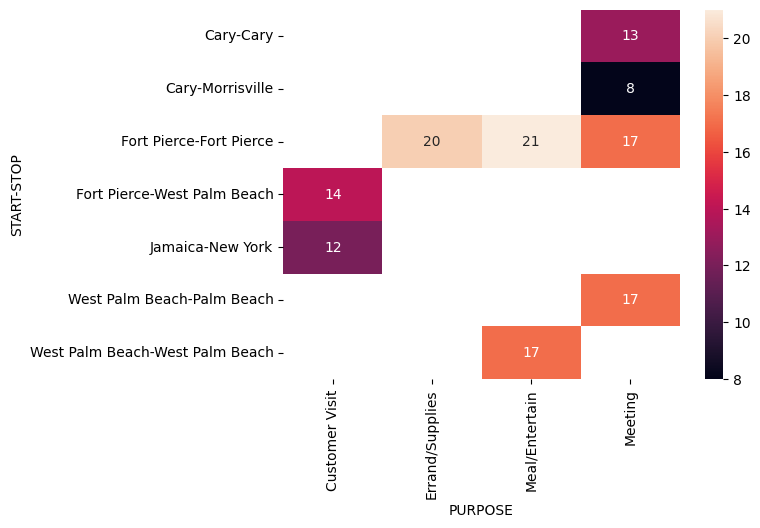

In [ ]:
a=pd.cut(df['START_TIME'],bins=[0,12,16,20,23.59],labels=['morning','afternoon','evening','night'])
a
b=pd.pivot_table(data=df.head(10),index=['START','STOP'],columns='PURPOSE',values='START_TIME',aggfunc=sum)
sns.heatmap(b,annot=True,fmt='0.0f')

<ipython-input-180-2627567633>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  b=pd.pivot_table(data=df.head(10),index=['START','STOP'],columns=a,values='START_TIME',aggfunc=sum)
<ipython-input-180-2627567633>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  b=pd.pivot_table(data=df.head(10),index=['START','STOP'],columns=a,values='START_TIME',aggfunc=sum)


<Axes: xlabel='START_TIME', ylabel='START-STOP'>

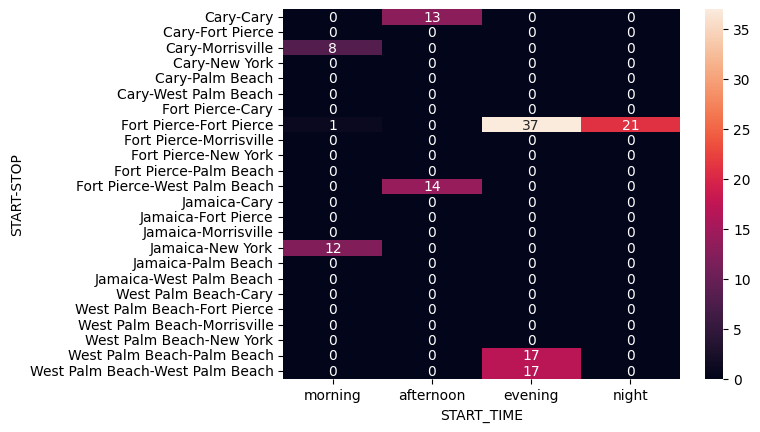

In [ ]:
a=pd.cut(df['START_TIME'],bins=[0,12,16,20,23.59],labels=['morning','afternoon','evening','night'])
a
b=pd.pivot_table(data=df.head(10),index=['START','STOP'],columns=a,values='START_TIME',aggfunc=sum)
sns.heatmap(b,annot=True,fmt='0.0f')

<Axes: xlabel='CATEGORY', ylabel='PURPOSE'>

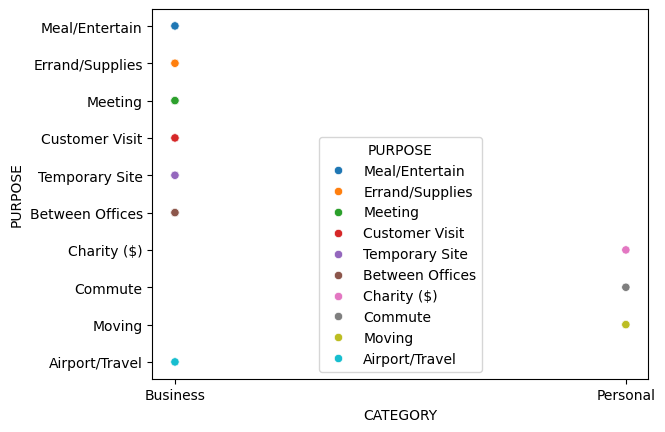

In [ ]:
sns.scatterplot(data=df,x='CATEGORY',y='PURPOSE',hue='PURPOSE')

In [ ]:
df['PURPOSE']=df['PURPOSE'].fillna('Meal/Entertain')

<Axes: xlabel='PURPOSE', ylabel='START_TIME'>

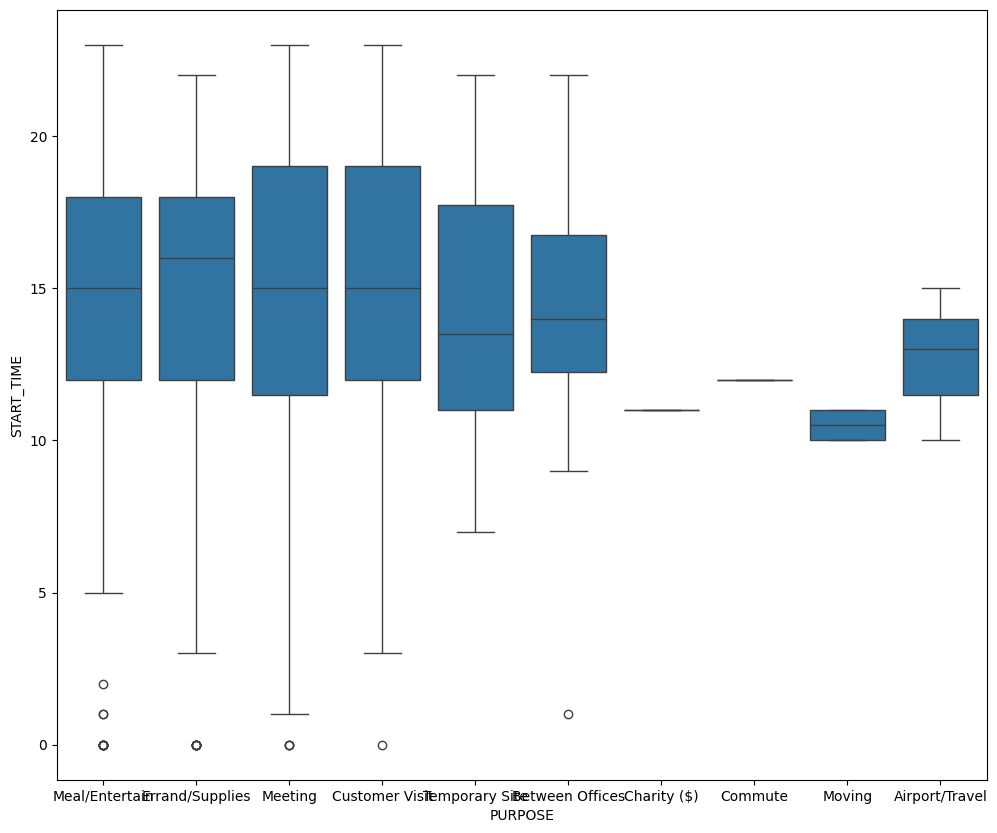

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='PURPOSE',y='START_TIME',data=df)

,START_TIME
0,21
1,1
2,20
3,17
4,14
...,...
1150,1
1151,13
1152,15
1153,21


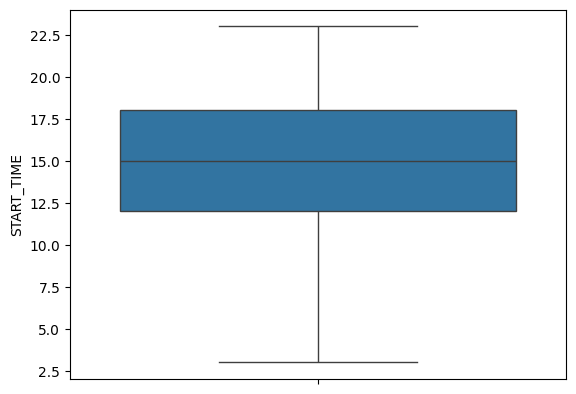

In [ ]:
# Outliers of start date
q1=df['START_TIME'].quantile(0.25)
q3=df['START_TIME'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df[(df['START_TIME']<lower_bound)|(df['START_TIME']>upper_bound)]
outliers
cleaned=df[(df['START_TIME']>=lower_bound)&(df['START_TIME']<=upper_bound)]
sns.boxplot(cleaned['START_TIME'])
df['START_TIME']


In [ ]:
# duration=df['START_TIME']-df['END_TIME']

<ipython-input-186-1375328719>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  b=pd.pivot_table(data=df.head(20),index=['START','STOP'],columns='duration',values='MILES',aggfunc=sum)


<Axes: xlabel='duration', ylabel='START-STOP'>

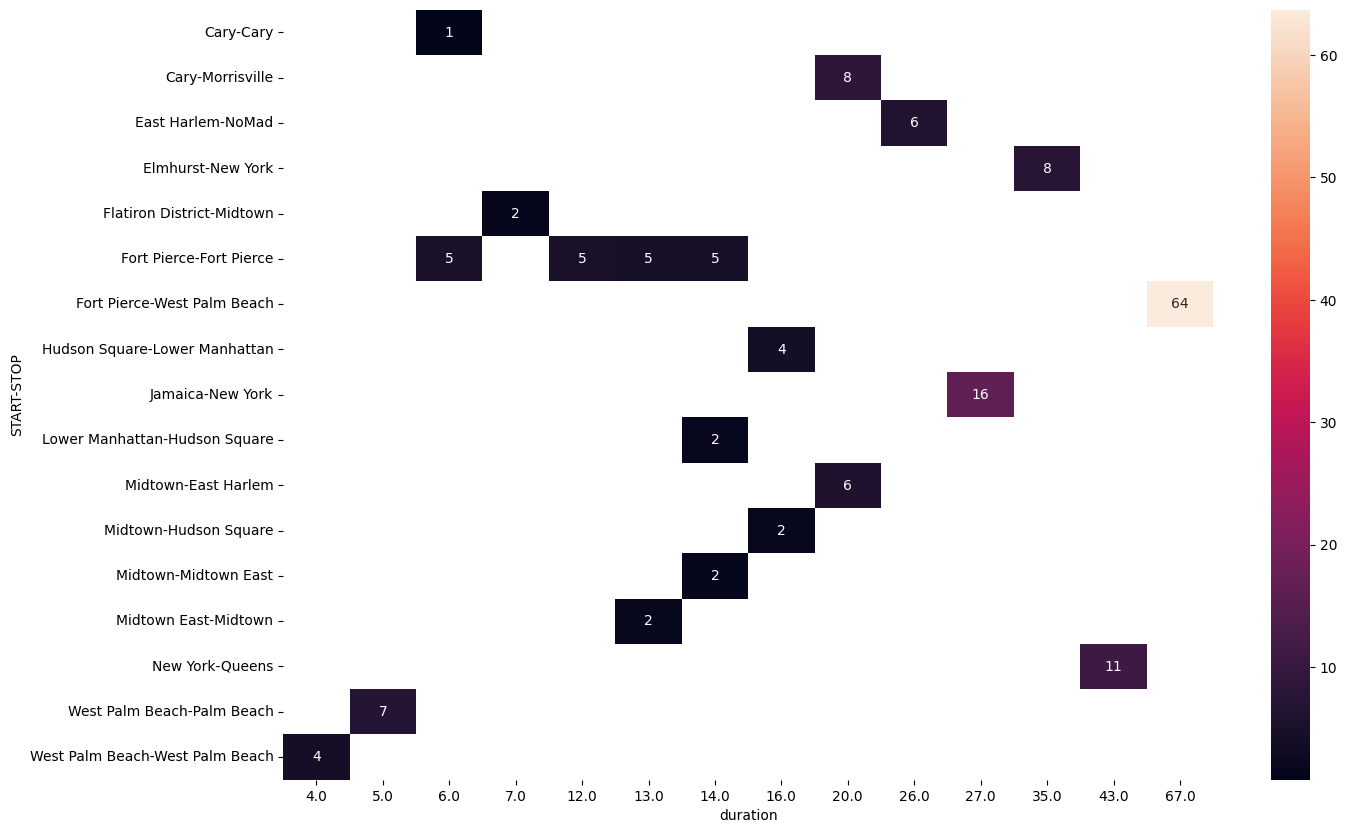

In [ ]:

# sns.barplot(x='START',y='MILES',data=df)
b=pd.pivot_table(data=df.head(20),index=['START','STOP'],columns='duration',values='MILES',aggfunc=sum)
plt.figure(figsize=(15,10))
sns.heatmap(b,annot=True,fmt='0.0f')

About Dataset:-This dataset contains Uber trip details, including start and end times, locations, miles traveled, and purposes.

The goal of this project was to analyze Uber rides data to identify patterns, optimize operations, and improve customer satisfaction Specifically. we focused on:

Identifying peak usage hours. Analyzing ride durations and distances. Understanding revenue patterns across regions. Proposing actionable insights to enhance service efficiency. The dataset consisted of: Time Range: One year,of Uber rides data. Features: Date, time, pickup and drop-off locations, fare amount, distance, payment methods, and user ratings. Data source: Publicly available Uber dataset on Kaggle of another open source.

Data Quality Issues: Inconsistent date formats (01/01/2016 vs 12/31/2016). Missing location names Unknown Location. Missing PURPOSE values ~10% of the data.

actions I would recommend using these insights to optimize driver availability during peak times, focus on frequently traveled routes, and address data gaps like Unknown Location to improve data quality for future analysis.

I started by cleaning the data by missing values in key columns like PURPOSE and STOP I standardized the date formats and removed irrelevant rows like totals.

In which category do people get book the uber most for which purpose at what time do people book cabs the most. in which month do people
book uber cabs less frequently.

Insights: - I analyzed that most trips are for business purposes, with Meeting and Customer Visit being the most frequent reasons. The majority of trips
occur within Fort Pierce, and peak travel times are during weekday afternoon.